In [1]:
import requests
import pandas as pd
import datetime
import json
from matplotlib import pyplot as plt
from ta import *

In [24]:
start = datetime.datetime(year=2016, month=1, day=1)
start = datetime.datetime.timestamp(start)
start

1451624400.0

In [25]:
def fetch_poloniex_df(currency_pair, start=int(start), end=9999999999, period=14400):
    data = fetch_poloniex(currency_pair, start, end, period)
    df = pd.DataFrame(data)
    df["date"] = df["date"].apply(lambda d: datetime.datetime.utcfromtimestamp(d))
    return df

def fetch_poloniex(currency_pair, start=int(start), end=9999999999, period=14400):
    api = "https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}"
    api = api.format(currency_pair, start, end, period)
    r = requests.get(api)
    return json.loads(r.text)

In [26]:
test = datetime.datetime(year=2018, month=1, day=1)
test = datetime.datetime.timestamp(test)
data = fetch_poloniex("BTC_ETH", start=test, period=14400)
data[0:3]

[{'date': 1514782800,
  'high': 0.05529993,
  'low': 0.05529993,
  'open': 0.05529993,
  'close': 0.05529993,
  'volume': 0,
  'quoteVolume': 0,
  'weightedAverage': 0.05529993},
 {'date': 1514793600,
  'high': 0.0562132,
  'low': 0.0548,
  'open': 0.0552999,
  'close': 0.056,
  'volume': 547.55177592,
  'quoteVolume': 9850.62286967,
  'weightedAverage': 0.05558549},
 {'date': 1514808000,
  'high': 0.057,
  'low': 0.05563538,
  'open': 0.056,
  'close': 0.05644,
  'volume': 908.67088856,
  'quoteVolume': 16102.02785405,
  'weightedAverage': 0.05643207}]

In [27]:
btc_df = fetch_poloniex_df("USDC_BTC", start=test, period=14400)
btc_df["mean"] = (btc_df["high"] + btc_df["low"])/2
btc_df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,mean
0,6481.846675,2018-09-27 12:00:00,6798.000000,6461.066881,6493.658601,0.876761,5701.874517,6503.337433,6629.533441
1,6659.700000,2018-09-27 16:00:00,6676.991255,6483.846675,6483.846675,9.025383,59127.199613,6551.212098,6580.418965
2,6677.567006,2018-09-27 20:00:00,6717.622625,6658.073256,6658.073256,0.997148,6673.005129,6692.093858,6687.847940
3,6690.000000,2018-09-28 00:00:00,6714.553283,6690.000000,6698.021814,4.600176,30886.459109,6714.191311,6702.276641
4,6753.315115,2018-09-28 04:00:00,6775.435948,6690.000000,6691.056128,1.195961,8028.622257,6713.111131,6732.717974


In [28]:
eth_df = fetch_poloniex_df("USDC_ETH", start=test, period=14400)
eth_df["mean"] = (eth_df["high"] + eth_df["low"])/2
eth_df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,mean
0,217.730911,2018-09-27 12:00:00,219.205421,206.834755,216.367107,46.947086,10270.606779,218.769847,213.020088
1,227.651851,2018-09-27 16:00:00,227.651851,216.557438,216.697533,148.485498,32975.113977,222.076327,222.104645
2,228.335474,2018-09-27 20:00:00,232.966266,227.795419,232.966266,61.941487,14235.311270,229.818690,230.380842
3,229.785611,2018-09-28 00:00:00,231.000000,227.817459,229.990000,6.293639,1445.498443,229.676087,229.408729
4,229.292054,2018-09-28 04:00:00,233.044802,228.785082,228.785082,42.977497,9944.621987,231.391373,230.914942


In [49]:
cols = ["open", "high", "low", "close", "quoteVolume", "volume", "weightedAverage", "mean"]
btc_df = btc_df.rename(columns={col: col+"_btc" for col in cols})


eth_df = eth_df.rename(columns={col: col+"_eth" for col in cols})

In [50]:
btc_eth = pd.merge(btc_df, eth_df,
                   on="date",
                   how="inner")
btc_eth.head()

,close_btc,date,high_btc,low_btc,open_btc,quoteVolume_btc,volume_btc,weightedAverage_btc,mean_btc,close_eth,high_eth,low_eth,open_eth,quoteVolume_eth,volume_eth,weightedAverage_eth,mean_eth
0,6481.846675,2018-09-27 12:00:00,6798.000000,6461.066881,6493.658601,0.876761,5701.874517,6503.337433,6629.533441,217.730911,219.205421,206.834755,216.367107,46.947086,10270.606779,218.769847,213.020088
1,6659.700000,2018-09-27 16:00:00,6676.991255,6483.846675,6483.846675,9.025383,59127.199613,6551.212098,6580.418965,227.651851,227.651851,216.557438,216.697533,148.485498,32975.113977,222.076327,222.104645
2,6677.567006,2018-09-27 20:00:00,6717.622625,6658.073256,6658.073256,0.997148,6673.005129,6692.093858,6687.847940,228.335474,232.966266,227.795419,232.966266,61.941487,14235.311270,229.818690,230.380842
3,6690.000000,2018-09-28 00:00:00,6714.553283,6690.000000,6698.021814,4.600176,30886.459109,6714.191311,6702.276641,229.785611,231.000000,227.817459,229.990000,6.293639,1445.498443,229.676087,229.408729
4,6753.315115,2018-09-28 04:00:00,6775.435948,6690.000000,6691.056128,1.195961,8028.622257,6713.111131,6732.717974,229.292054,233.044802,228.785082,228.785082,42.977497,9944.621987,231.391373,230.914942


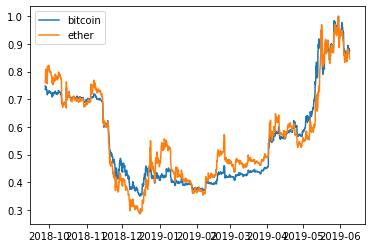

In [51]:
maxVal = btc_eth["high_btc"].max()
btc_eth["btc_norm"] = btc_eth["high_btc"].apply(lambda val: val/maxVal)

maxVal = btc_eth["high_eth"].max()
btc_eth["eth_norm"] = btc_eth["high_eth"].apply(lambda val: val/maxVal)

plt.plot(btc_eth["date"], btc_eth["btc_norm"], btc_eth["date"], btc_eth["eth_norm"])
plt.legend(["bitcoin", "ether"])

plt.show()

In [52]:
btc_eth["btc_norm"].shape

(1528,)

In [53]:
btc_eth["eth_norm"].shape

(1528,)

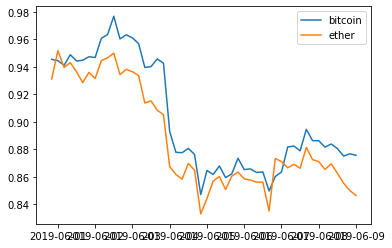

In [54]:
maxVal = btc_eth["high_btc"].max()
btc_eth["btc_norm"] = btc_eth["high_btc"].apply(lambda val: val/maxVal)

maxVal = btc_eth["high_eth"].max()
btc_eth["eth_norm"] = btc_eth["high_eth"].apply(lambda val: val/maxVal)

limit = 50
x = btc_eth["date"].tail(limit)
btc = btc_eth["btc_norm"].tail(limit)
eth =  btc_eth["eth_norm"].tail(limit)

plt.plot(x, btc, x, eth)
plt.legend(["bitcoin", "ether"])

plt.show()

In [55]:
btc_eth["prev_high_btc"] = btc_eth["high_btc"].shift(1, fill_value=btc_eth.iloc[0]["high_btc"])
btc_eth["high_btc_pchange"] = (btc_eth["high_btc"] / btc_eth["prev_high_btc"]).apply(lambda v: v - 1)
btc_eth.head()[["prev_high_btc", "high_btc", "high_btc_pchange"]]

,prev_high_btc,high_btc,high_btc_pchange
0,6798.000000,6798.000000,0.000000
1,6798.000000,6676.991255,-0.017801
2,6676.991255,6717.622625,0.006085
3,6717.622625,6714.553283,-0.000457
4,6714.553283,6775.435948,0.009067


In [56]:
btc_eth["prev_high_eth"] = btc_eth["high_eth"].shift(1, fill_value=btc_eth.iloc[0]["high_eth"])
btc_eth["high_eth_pchange"] = (btc_eth["high_eth"] / btc_eth["prev_high_eth"]).apply(lambda v: v - 1)
btc_eth.head()[["prev_high_eth", "high_eth", "high_eth_pchange"]]

,prev_high_eth,high_eth,high_eth_pchange
0,219.205421,219.205421,0.000000
1,219.205421,227.651851,0.038532
2,227.651851,232.966266,0.023344
3,232.966266,231.000000,-0.008440
4,231.000000,233.044802,0.008852


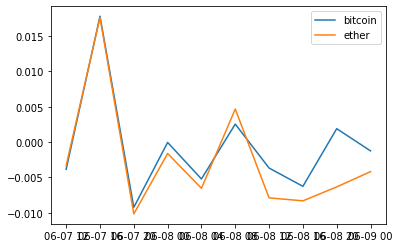

In [57]:
limit = 10
x = btc_eth["date"].tail(limit)
btc = btc_eth["high_btc_pchange"].tail(limit)
eth =  btc_eth["high_eth_pchange"].tail(limit)

plt.plot(x, btc, x, eth)
plt.legend(["bitcoin", "ether"])

plt.show()

## Identify POI

In [58]:
btc_eth.head(3)

,close_btc,date,high_btc,low_btc,open_btc,quoteVolume_btc,volume_btc,weightedAverage_btc,mean_btc,close_eth,...,quoteVolume_eth,volume_eth,weightedAverage_eth,mean_eth,btc_norm,eth_norm,prev_high_btc,high_btc_pchange,prev_high_eth,high_eth_pchange
0,6481.846675,2018-09-27 12:00:00,6798.000000,6461.066881,6493.658601,0.876761,5701.874517,6503.337433,6629.533441,217.730911,...,46.947086,10270.606779,218.769847,213.020088,0.747780,0.760074,6798.000000,0.000000,219.205421,0.000000
1,6659.700000,2018-09-27 16:00:00,6676.991255,6483.846675,6483.846675,9.025383,59127.199613,6551.212098,6580.418965,227.651851,...,148.485498,32975.113977,222.076327,222.104645,0.734469,0.789361,6798.000000,-0.017801,219.205421,0.038532
2,6677.567006,2018-09-27 20:00:00,6717.622625,6658.073256,6658.073256,0.997148,6673.005129,6692.093858,6687.847940,228.335474,...,61.941487,14235.311270,229.818690,230.380842,0.738939,0.807789,6676.991255,0.006085,227.651851,0.023344


In [59]:
import importlib
import find_poi
importlib.reload(find_poi)


x = btc_eth.index
y = btc_eth["high_btc"].copy()

bounds = find_poi.find_poi_df(x, y, window_size=100, threshold=0.05, merge_intervals=True)
len(bounds)

14

In [60]:
x_start_points = []
y_start_points = []

x_end_points = []
y_end_points = []

for bound in bounds:
    x_start_points.append(btc_eth["date"].iloc[bound[0]])
    x_end_points.append(btc_eth["date"].iloc[bound[1]])
    y_start_points.append(btc_eth["high_btc"].iloc[bound[0]])
    y_end_points.append(btc_eth["high_btc"].iloc[bound[1]])

----

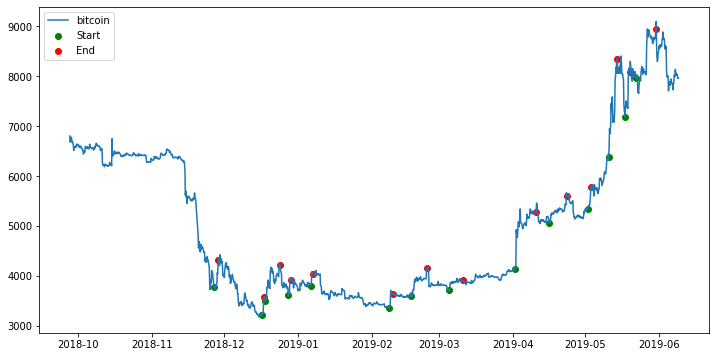

In [61]:


fig = plt.figure(figsize=(12, 6))


plt.plot(btc_eth["date"], btc_eth["high_btc"], figure=fig)

plt.scatter(x_start_points, y_start_points, color="green")
plt.scatter(x_end_points, y_end_points, color="red")


plt.legend(["bitcoin", "Start", "End"])


plt.show()

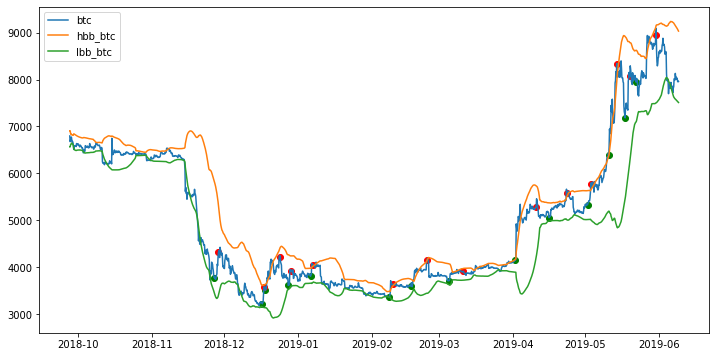

In [62]:
btc_eth["btc_bb_high"] = bollinger_hband(btc_eth["high_btc"], n=60, ndev=2, fillna=True)
btc_eth["btc_bb_low"] = bollinger_lband(btc_eth["high_btc"], n=60, ndev=2, fillna=True)


fig = plt.figure(figsize=(12, 6))


plt.plot(btc_eth["date"], btc_eth["high_btc"], figure=fig, label="btc")
plt.plot(btc_eth["date"], btc_eth["btc_bb_high"], label="hbb_btc")
plt.plot(btc_eth["date"], btc_eth["btc_bb_low"], label="lbb_btc")

plt.scatter(x_start_points, y_start_points, color="green")
plt.scatter(x_end_points, y_end_points, color="red")

plt.legend()




plt.show()